In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import string

import os
import math
import re
import nltk

import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'matplotlib'

In [5]:
sms = pd.read_csv(r'C:\Users\Aman Tiwari\Downloads\Intel-Email-Fraud-Project-code\Intel-Email-Fraud-Project-code\spam.csv', encoding='latin-1')
sms.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Changing the name of columns
sms = sms.rename(columns={'v1':'label', 'v2':'text'})

# removing  useless columns
sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

# Label mapping: ham->0, spam-> 1
sms['label_num'] = sms['label'].map({'ham':0, 'spam':1})

# Length column
sms['Length'] = sms['text'].apply(len)
sms.head()

,label,text,label_num,Length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [7]:
# Plot
# Distribution of Length with std and mean
# Mean length of spam mail
# Mean Length of ham email
# Number of spam and ham emails (done) 

In [8]:
sms['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='label'>

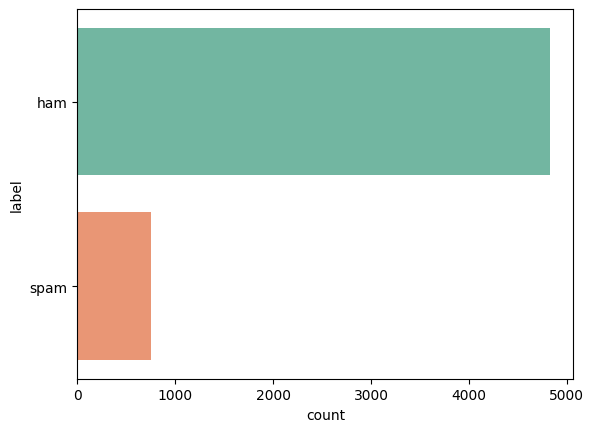

In [9]:
sns.countplot(sms['label'],palette=sns.color_palette("Set2"))

<Axes: ylabel='count'>

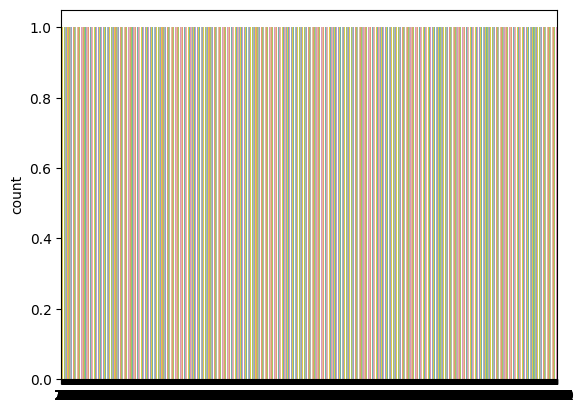

In [10]:
sns.countplot(sms['Length'], palette=sns.color_palette("Set2"))

In [10]:
print("Average Length of a text is", round(sms['Length'].mean()))
print("Standard deviation of length is", round(sms['Length'].std()))

Average Length of a text is 80
Standard deviation of length is 60


In [12]:
spam_len = sms.loc[sms["label_num"] == 1, "Length"]
ham_len = sms.loc[sms["label_num"] == 0, "Length"]

In [13]:
spam_len.mean()

138.8661311914324

In [14]:
ham_len.mean()

71.02362694300518

<AxesSubplot:xlabel='Length', ylabel='count'>

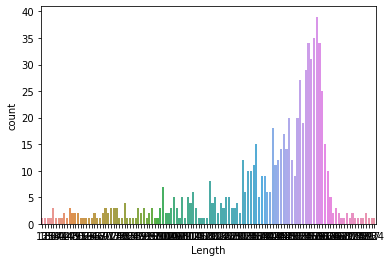

In [15]:
sns.countplot(spam_len)

In [16]:
print("Average Length of a text of ham mail is", round(ham_len.mean()))
print("Standard deviation of length of ham mail is", round(ham_len.std()))

Average Length of a text of ham mail is 71
Standard deviation of length of ham mail is 58


In [17]:
# Text PRocessing

In [18]:

# Removing punctuations like . , ! $( ) * % @

# Removing Stop words

#Lower casing

#Tokenization

In [19]:
# Remove Punctuation

def remove_punctuation(text):
    puncFree ="".join([i for i in text if i not in string.punctuation])
    return puncFree

sms['text'] = sms['text'].apply(lambda x: remove_punctuation(x))

In [20]:
# Lower Case
sms['text'] = sms['text'].apply(lambda x: x.lower())

In [21]:
from sklearn.model_selection import train_test_split

# dataframe -> array
X, y = np.asanyarray(sms['text']), np.asanyarray(sms['label_num'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
len(X_train), len(X_test)

(4457, 1115)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


counter_vec = CountVectorizer().fit(X_train)
X_train_vec, X_test_vec = counter_vec.transform(X_train), counter_vec.transform(X_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       971
           1       0.99      0.90      0.95       144

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Accuracy of Naive Bayes is 0.9865470852017937


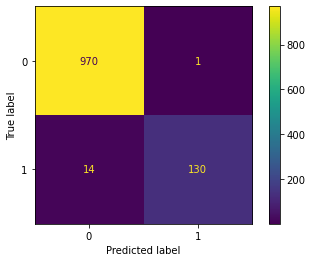

In [23]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)

print(classification_report(y_test, model.predict(X_test_vec)))

plot_confusion_matrix(model, X_test_vec, y_test)

print("Accuracy of Naive Bayes is", accuracy_score(y_test, model.predict(X_test_vec)))

scores = cross_val_score(model, X_train_vec, y_train)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       971
           1       1.00      0.78      0.88       144

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy of Random Forest Classifier is 0.9713004484304932


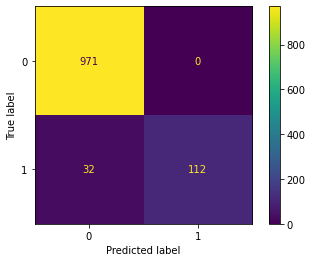

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_vec, y_train)

print(classification_report(y_test, model.predict(X_test_vec)))

plot_confusion_matrix(model, X_test_vec, y_test)

print("Accuracy of Random Forest Classifier is", accuracy_score(y_test, model.predict(X_test_vec)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       971
           1       1.00      0.87      0.93       144

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy of Logistic regression is 0.9829596412556054


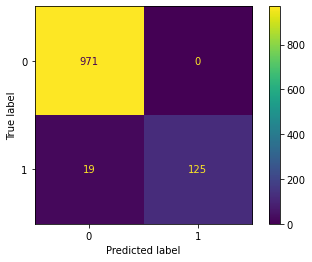

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)

print(classification_report(y_test, model.predict(X_test_vec)))

plot_confusion_matrix(model, X_test_vec, y_test)


print("Accuracy of Logistic regression is", accuracy_score(y_test, model.predict(X_test_vec)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       971
           1       1.00      0.84      0.91       144

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy of Support Vector machine is 0.979372197309417


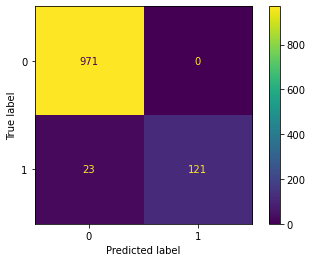

In [26]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train_vec, y_train)

print(classification_report(y_test, model.predict(X_test_vec)))

plot_confusion_matrix(model, X_test_vec, y_test)


print("Accuracy of Support Vector machine is", accuracy_score(y_test, model.predict(X_test_vec)))